# Bitcoin Price Prediction using Linear Regression

## Importing the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Loading the Dataset

In [3]:
df=pd.read_csv('Bitcoin Dataset.csv')

In [4]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploring the Dataset

In [5]:
df.shape

(4857377, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [7]:
df.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,4.857377e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06
mean,1.471301e+09,6.009024e+03,6.013357e+03,6.004488e+03,6.009014e+03,9.323249e+00,4.176284e+04,6.008935e+03
std,8.428019e+07,8.996247e+03,9.003521e+03,8.988778e+03,8.996360e+03,3.054989e+01,1.518248e+05,8.995992e+03
min,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.398179e+09,4.438600e+02,4.440000e+02,4.435200e+02,4.438600e+02,4.097759e-01,4.521422e+02,4.438306e+02
50%,1.471428e+09,3.596970e+03,3.598190e+03,3.595620e+03,3.597000e+03,1.979811e+00,3.810124e+03,3.596804e+03
75%,1.544288e+09,8.627270e+03,8.632980e+03,8.621090e+03,8.627160e+03,7.278216e+00,2.569821e+04,8.627637e+03
max,1.617149e+09,6.176356e+04,6.178183e+04,6.167355e+04,6.178180e+04,5.853852e+03,1.390067e+07,6.171621e+04


In [8]:
df.isnull().sum()

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

## Preprocessing the Data

#### Converting the timestamp to dates and storing in a new column for easier access

In [10]:
df['Dates'] = pd.to_datetime(df['Timestamp'], unit='s')
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Dates
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 07:52:00
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:53:00
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:54:00
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:55:00
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:56:00


#### Dropping null values

In [11]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
Dates                0
dtype: int64

## Extracting columns necessary for the Model

In [14]:
required = ['Open', 'High', 'Low', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price']
output = 'Close'

In [15]:
required

['Open', 'High', 'Low', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price']

In [16]:
output

'Close'

## Splitting the data to Train and Test

In [18]:
x_train, x_test, y_train, y_test = train_test_split(df[required],df[output],test_size = 0.3)

## Creating the Model

In [20]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

#### Checking the score of our model

In [21]:
model.score(x_test, y_test)

0.9999993738160099

## Prediction

In [24]:
future = df.shift(periods=30).tail(30)

In [26]:
prediction = model.predict(future[required])

In [27]:
prediction

array([58712.75564569, 58652.33076024, 58636.16787455, 58663.08361175,
       58610.89242876, 58602.04354581, 58625.23859745, 58591.16595794,
       58611.28677169, 58614.27539848, 58661.92086511, 58706.4077426 ,
       58715.13408739, 58680.50140973, 58713.11734043, 58723.34996972,
       58691.83732316, 58635.17918018, 58624.26006277, 58619.52597173,
       58627.42794197, 58663.21477865, 58644.91575994, 58614.80759691,
       58600.90686303, 58662.24894884, 58695.76988962, 58719.68113174,
       58725.13508131, 58738.31138221])

## Plotting a graph  for better visualization

Text(0, 0.5, '$ Price')

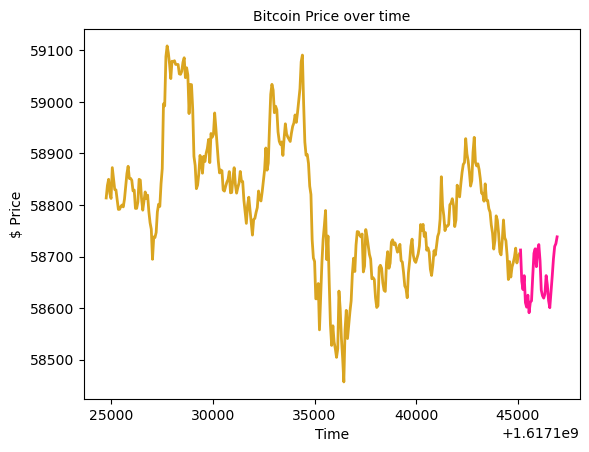

In [31]:
plt.plot(df["Timestamp"][-400:-60], df["Weighted_Price"][-400:-60], color='goldenrod', lw=2)
plt.plot(future["Timestamp"], prediction, color='deeppink', lw=2)
plt.title("Bitcoin Price over time", size=10)
plt.xlabel("Time", size=10)
plt.ylabel("$ Price", size=10)

### Although we were successful to an extent, this wouldn't work in real world as cryptocurrencies are highly volatile and unpredictable. New factors could come into play anytime which could affect the price.